# 📊 StockPulse Data Analysis
### Comprehensive Analysis of Multi-Sector NSE Stock Data

This notebook provides detailed analysis of stock data for **63+ companies across 10 sectors** including:
- Multi-sector price trend analysis
- Technical indicators across sectors
- Portfolio volatility analysis
- Cross-sector correlation analysis
- Sector-wise risk metrics
- Performance comparison across industries

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("📦 Libraries imported successfully!")

📦 Libraries imported successfully!


In [11]:
# Load all available processed stock data
import os
import glob

# Get all processed CSV files
data_path = '../data/processed'
csv_files = glob.glob(os.path.join(data_path, '*_processed.csv'))

# Filter out analysis files
stock_files = [f for f in csv_files if not any(x in f for x in ['analysis_metrics', 'correlation_matrix'])]

print(f"📂 Found {len(stock_files)} processed stock files")

# Load stock data
data = {}

# Extended sector mapping for comprehensive coverage
sectors = {
    # Technology
    'RELIANCE': 'Energy', 'TCS': 'Technology', 'INFY': 'Technology',
    'WIPRO': 'Technology', 'HCLTECH': 'Technology', 'TECHM': 'Technology', 'MPHASIS': 'Technology',
    
    # Banking
    'HDFCBANK': 'Banking', 'ICICIBANK': 'Banking', 'SBIN': 'Banking', 'KOTAKBANK': 'Banking',
    'AXISBANK': 'Banking', 'INDUSINDBK': 'Banking', 'FEDERALBNK': 'Banking', 'BANDHANBNK': 'Banking',
    
    # Energy
    'ONGC': 'Energy', 'IOC': 'Energy', 'BPCL': 'Energy', 'GAIL': 'Energy', 
    'HINDPETRO': 'Energy', 'ADANIGREEN': 'Energy', 'TATAPOWER': 'Energy',
    
    # Pharmaceuticals
    'SUNPHARMA': 'Pharmaceuticals', 'DRREDDY': 'Pharmaceuticals', 'CIPLA': 'Pharmaceuticals',
    'DIVISLAB': 'Pharmaceuticals', 'BIOCON': 'Pharmaceuticals', 'LUPIN': 'Pharmaceuticals',
    'AUROPHARMA': 'Pharmaceuticals', 'TORNTPHARM': 'Pharmaceuticals',
    
    # FMCG
    'HINDUNILVR': 'FMCG', 'ITC': 'FMCG', 'BRITANNIA': 'FMCG', 'DABUR': 'FMCG',
    'MARICO': 'FMCG', 'GODREJCP': 'FMCG', 'COLPAL': 'FMCG', 'NESTLEIND': 'FMCG',
    
    # Automobile
    'MARUTI': 'Automobile', 'TATAMOTORS': 'Automobile', 'M&M': 'Automobile', 'BAJAJ-AUTO': 'Automobile',
    'HEROMOTOCO': 'Automobile', 'EICHERMOT': 'Automobile', 'ASHOKLEY': 'Automobile', 'BOSCHLTD': 'Automobile',
    
    # Metals
    'TATASTEEL': 'Metals', 'HINDALCO': 'Metals', 'JSWSTEEL': 'Metals', 'SAIL': 'Metals',
    'COALINDIA': 'Metals', 'VEDL': 'Metals', 'JINDALSTEL': 'Metals', 'NMDC': 'Metals',
    
    # Infrastructure
    'LT': 'Infrastructure', 'ULTRACEMCO': 'Infrastructure', 'GRASIM': 'Infrastructure',
    'SHREECEM': 'Infrastructure', 'RAMCOCEM': 'Infrastructure', 'ACC': 'Infrastructure',
    'AMBUJACEMENT': 'Infrastructure', 'INFRATEL': 'Infrastructure',
    
    # Telecom
    'BHARTIARTL': 'Telecom', 'IDEA': 'Telecom',
    
    # Utilities
    'POWERGRID': 'Utilities', 'NTPC': 'Utilities', 'ADANIPOWER': 'Utilities', 'JSPL': 'Utilities'
}

for file_path in stock_files[:15]:  # Load first 15 for performance
    try:
        # Extract stock name from filename
        filename = os.path.basename(file_path)
        stock_name = filename.replace('_processed.csv', '')
        
        df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
        data[stock_name] = df
        
        # Get sector info
        base_name = stock_name.replace('_NS', '').replace('-', '')  # Handle special characters
        sector = sectors.get(base_name, 'Other')
        
        print(f"✅ Loaded {stock_name} ({sector}): {len(df)} records from {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
        
    except Exception as e:
        print(f"❌ Error loading {os.path.basename(file_path)}: {str(e)}")

print(f"\n📊 Successfully loaded {len(data)} stocks for analysis")
print(f"🏢 Sectors represented: {len(set([sectors.get(stock.replace('_NS', '').replace('-', ''), 'Other') for stock in data.keys()]))} sectors")

📂 Found 65 processed stock files
✅ Loaded ACC_NS (Infrastructure): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded ADANIGREEN_NS (Energy): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded ADANIPOWER_NS (Utilities): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded ASHOKLEY_NS (Automobile): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded AUROPHARMA_NS (Pharmaceuticals): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded AXISBANK_NS (Banking): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded BAJAJ-AUTO_NS (Other): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded BANDHANBNK_NS (Banking): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded BHARTIARTL_NS (Telecom): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded BIOCON_NS (Pharmaceuticals): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded BOSCHLTD_NS (Automobile): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded BPCL_NS (Energy): 43 records from 2025-07-22 to 2025-09-19
✅ Loaded BRITANNIA_NS (FMCG): 43 records from 2025-07-22 to 202

In [12]:
# Data Overview
print("📈 MULTI-SECTOR STOCK DATA OVERVIEW")
print("=" * 60)

if data:
    # Create summary DataFrame
    summary_data = []
    for stock_name, df in data.items():
        base_name = stock_name.replace('_NS', '')
        sector = sectors.get(base_name, 'Other')
        
        summary_data.append({
            'Stock': stock_name,
            'Sector': sector,
            'Records': len(df),
            'Date_Range': f"{df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}",
            'Latest_Price': df['Close'].iloc[-1] if 'Close' in df.columns else 'N/A',
            'Avg_Volume': df['Volume'].mean() if 'Volume' in df.columns else 'N/A'
        })
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))
    
    # Sector distribution
    print(f"\n🏢 SECTOR DISTRIBUTION:")
    sector_counts = summary_df['Sector'].value_counts()
    for sector, count in sector_counts.items():
        print(f"  {sector}: {count} companies")
else:
    print("❌ No data loaded. Please check the data files.")

📈 MULTI-SECTOR STOCK DATA OVERVIEW
        Stock          Sector  Records               Date_Range  Latest_Price   Avg_Volume
       ACC_NS  Infrastructure       43 2025-07-22 to 2025-09-19   1879.099976 3.328132e+05
ADANIGREEN_NS          Energy       43 2025-07-22 to 2025-09-19   1030.699951 1.882202e+06
ADANIPOWER_NS       Utilities       43 2025-07-22 to 2025-09-19    141.880005 2.306387e+07
  ASHOKLEY_NS      Automobile       43 2025-07-22 to 2025-09-19    140.889999 1.476072e+07
AUROPHARMA_NS Pharmaceuticals       43 2025-07-22 to 2025-09-19   1119.199951 1.392631e+06
  AXISBANK_NS         Banking       43 2025-07-22 to 2025-09-19   1135.900024 6.120450e+06
BAJAJ-AUTO_NS      Automobile       43 2025-07-22 to 2025-09-19   8971.500000 3.980233e+05
BANDHANBNK_NS         Banking       43 2025-07-22 to 2025-09-19    167.080002 4.370351e+06
BHARTIARTL_NS         Telecom       43 2025-07-22 to 2025-09-19   1962.400024 6.620092e+06
    BIOCON_NS Pharmaceuticals       43 2025-07-22 to 20

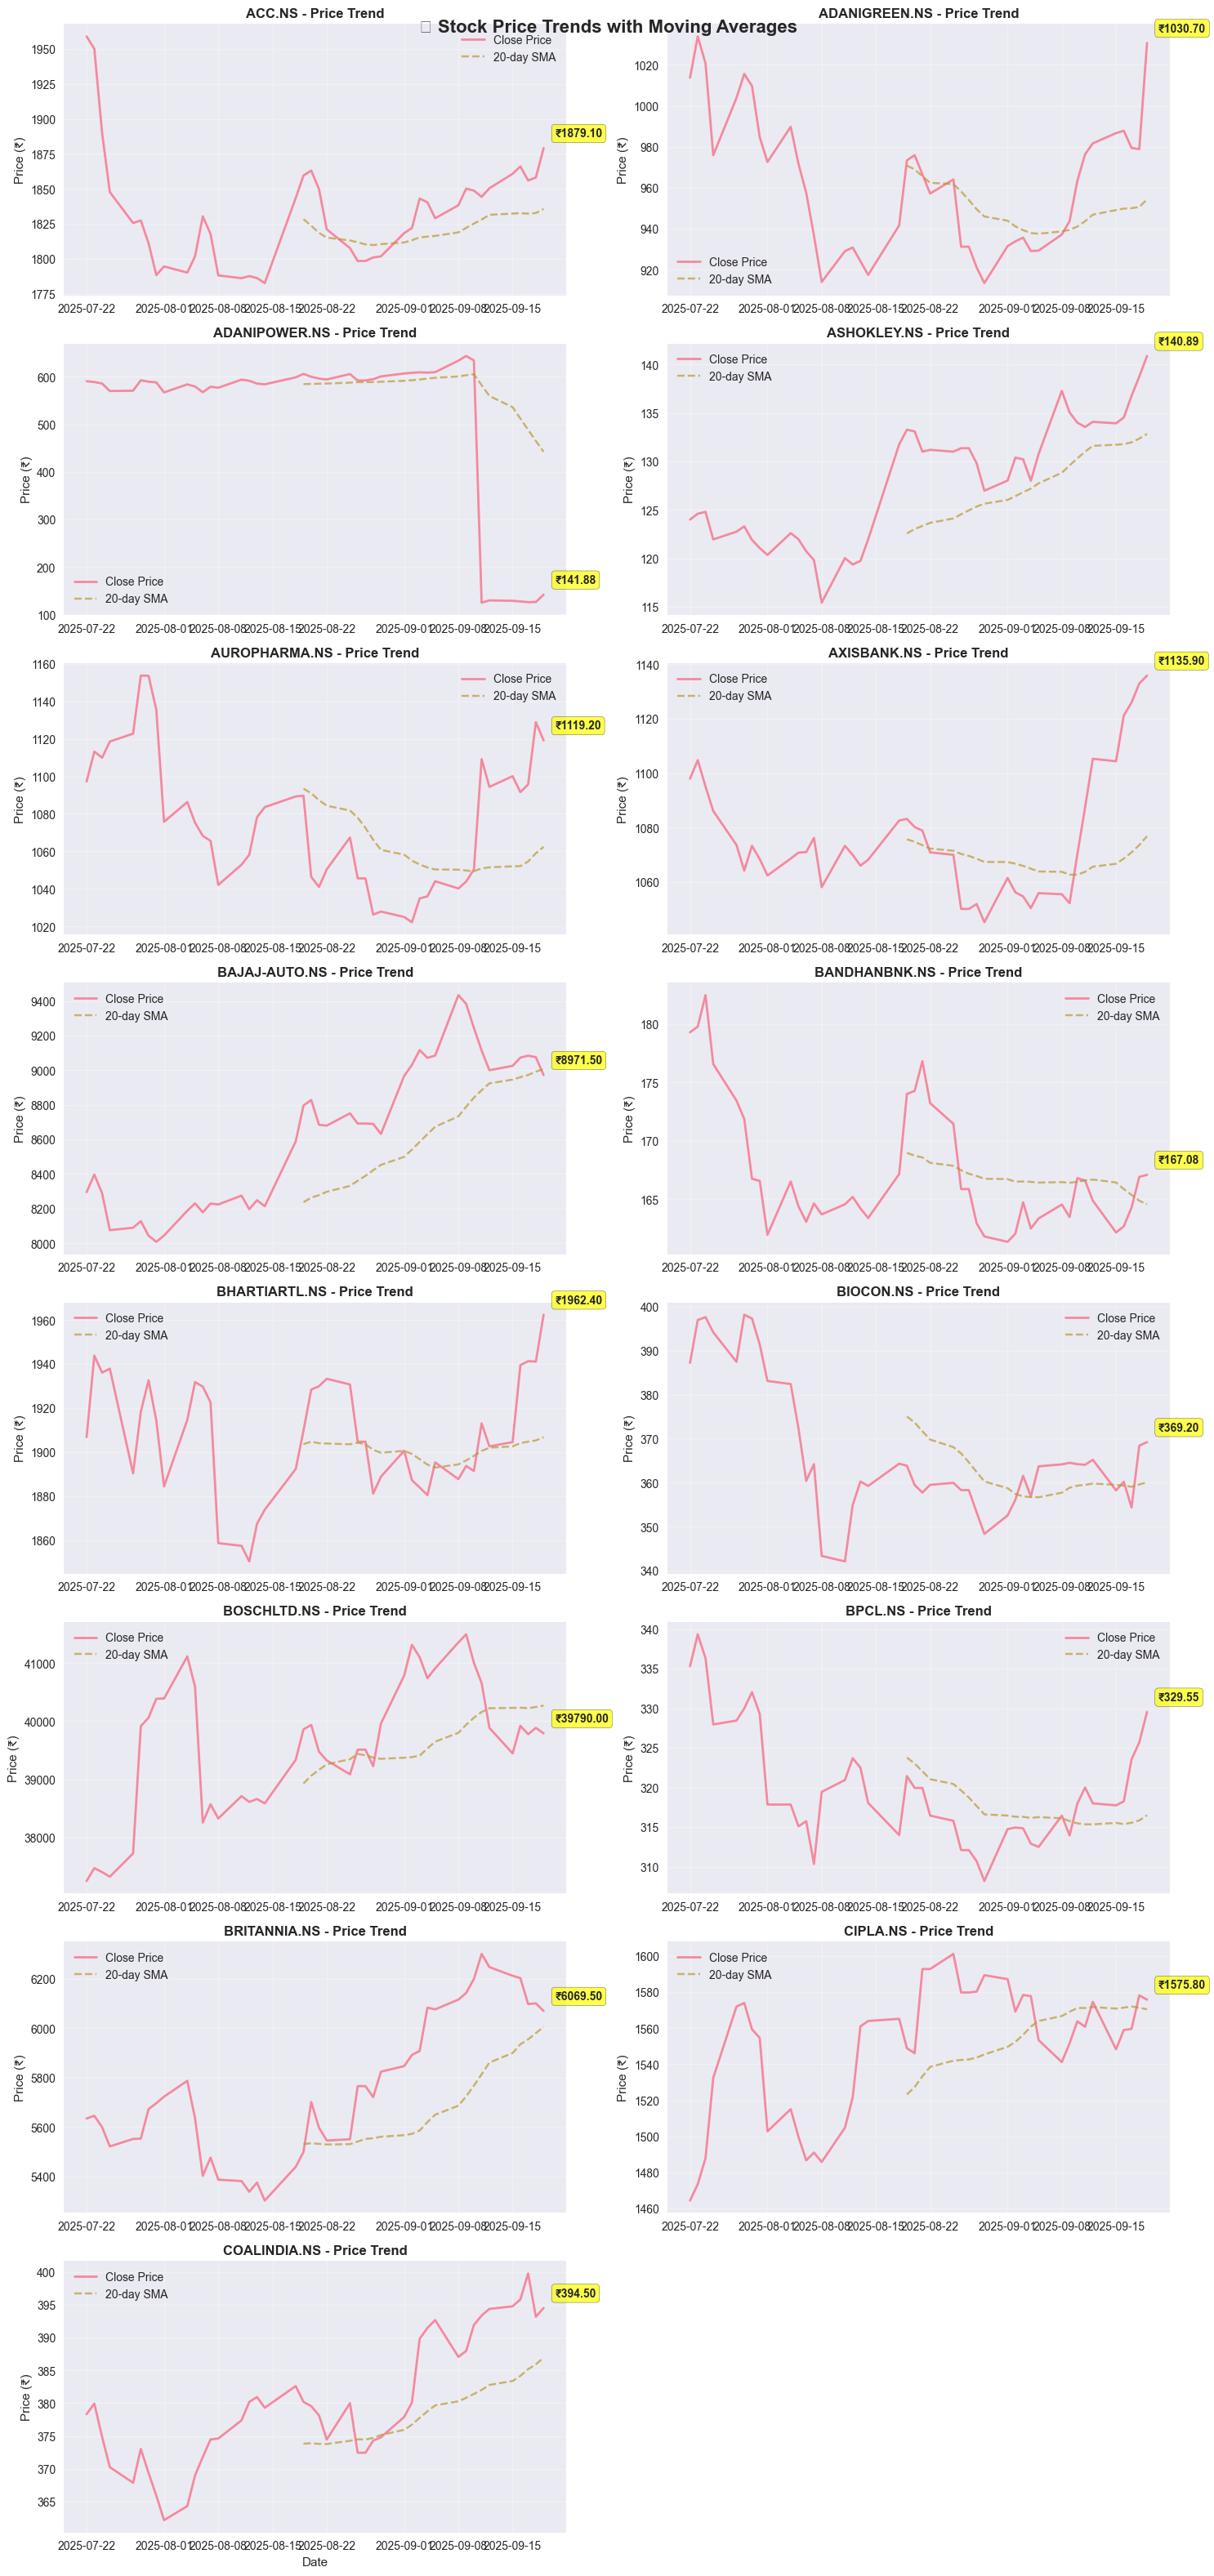

In [13]:
# 1. Price Trend Analysis
if data:
    num_stocks = len(data)
    
    # Calculate grid dimensions for subplots
    cols = 2 if num_stocks > 4 else 1
    rows = (num_stocks + cols - 1) // cols  # Ceiling division
    
    fig, axes = plt.subplots(rows, cols, figsize=(15 if cols == 2 else 12, 4 * rows))
    fig.suptitle('📈 Stock Price Trends with Moving Averages', fontsize=16, fontweight='bold')
    
    # Handle single subplot case
    if num_stocks == 1:
        axes = [axes]
    elif rows == 1 and cols > 1:
        axes = axes if isinstance(axes, np.ndarray) else [axes]
    else:
        axes = axes.flatten() if num_stocks > 1 else [axes]
    
    for i, (stock_name, df) in enumerate(data.items()):
        ax = axes[i]
        
        # Plot closing price
        ax.plot(df.index, df['Close'], label='Close Price', linewidth=2, alpha=0.8)
        
        # Plot SMA if available
        if 'SMA_20' in df.columns:
            ax.plot(df.index, df['SMA_20'], label='20-day SMA', linestyle='--', alpha=0.7)
        
        ax.set_title(f'{stock_name.replace("_", ".")} - Price Trend', fontweight='bold')
        ax.set_ylabel('Price (₹)')
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        # Add current price annotation
        current_price = df['Close'].iloc[-1]
        ax.annotate(f'₹{current_price:.2f}', 
                    xy=(df.index[-1], current_price),
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                    fontweight='bold')
    
    # Hide unused subplots
    for i in range(num_stocks, len(axes)):
        axes[i].set_visible(False)
    
    # Add xlabel to bottom plots
    if rows > 1:
        for i in range(cols):
            if (rows - 1) * cols + i < num_stocks:
                axes[(rows - 1) * cols + i].set_xlabel('Date')
    else:
        axes[0].set_xlabel('Date')
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ No data available for price trend analysis")

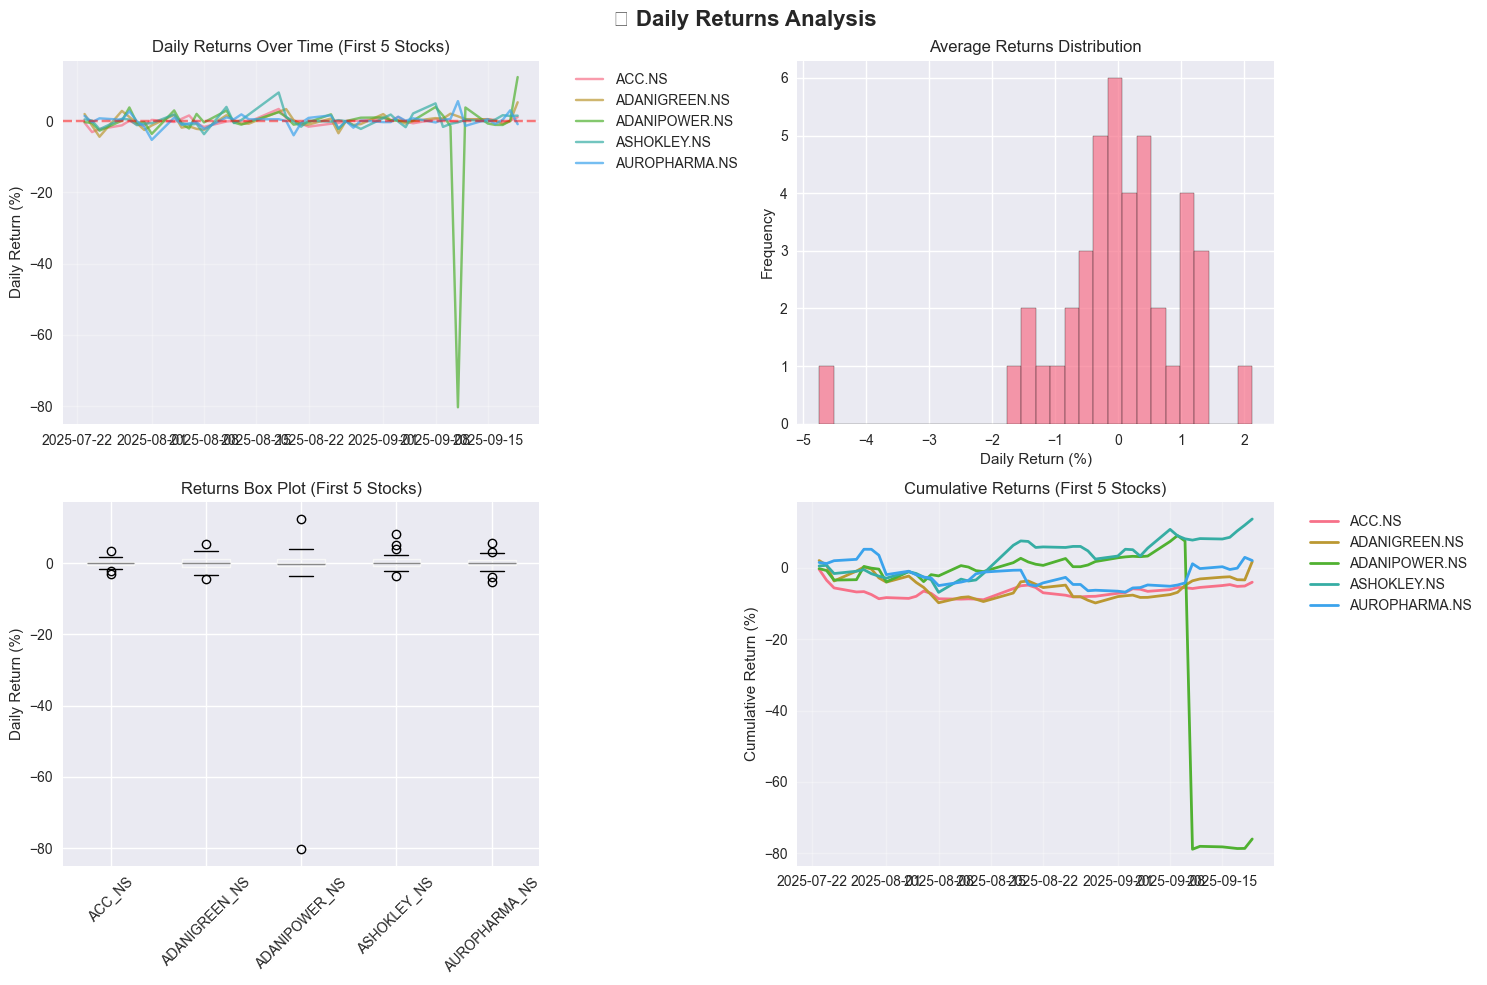

📊 Analysis includes 15 stocks with return data


In [14]:
# 2. Daily Returns Analysis
if data:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('📊 Daily Returns Analysis', fontsize=16, fontweight='bold')
    
    # Combine all returns for comparison
    returns_data = pd.DataFrame()
    for stock_name, df in data.items():
        if 'Daily_Return' in df.columns:
            returns_data[stock_name] = df['Daily_Return'] * 100  # Convert to percentage
    
    if not returns_data.empty:
        # Plot 1: Daily returns over time
        ax1 = axes[0, 0]
        for stock in returns_data.columns[:5]:  # Limit to first 5 for readability
            ax1.plot(returns_data.index, returns_data[stock], alpha=0.7, label=stock.replace('_', '.'))
        ax1.set_title('Daily Returns Over Time (First 5 Stocks)')
        ax1.set_ylabel('Daily Return (%)')
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax1.grid(True, alpha=0.3)
        ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)
        
        # Plot 2: Returns distribution (average across all stocks)
        ax2 = axes[0, 1]
        avg_returns = returns_data.mean(axis=1)
        ax2.hist(avg_returns, bins=30, alpha=0.7, edgecolor='black')
        ax2.set_title('Average Returns Distribution')
        ax2.set_xlabel('Daily Return (%)')
        ax2.set_ylabel('Frequency')
        
        # Plot 3: Box plot of returns (first 5 stocks)
        ax3 = axes[1, 0]
        first_5_returns = returns_data.iloc[:, :5]
        first_5_returns.boxplot(ax=ax3)
        ax3.set_title('Returns Box Plot (First 5 Stocks)')
        ax3.set_ylabel('Daily Return (%)')
        ax3.tick_params(axis='x', rotation=45)
        
        # Plot 4: Cumulative returns
        ax4 = axes[1, 1]
        cumulative_returns = (1 + returns_data/100).cumprod() - 1
        for stock in cumulative_returns.columns[:5]:  # Limit to first 5
            ax4.plot(cumulative_returns.index, cumulative_returns[stock] * 100, 
                     label=stock.replace('_', '.'), linewidth=2)
        ax4.set_title('Cumulative Returns (First 5 Stocks)')
        ax4.set_ylabel('Cumulative Return (%)')
        ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(f"📊 Analysis includes {len(returns_data.columns)} stocks with return data")
    else:
        print("❌ No return data available for analysis")
else:
    print("❌ No data available for returns analysis")

⚖️ RISK & RETURN ANALYSIS
                           ACC_NS  ADANIGREEN_NS  ADANIPOWER_NS  ASHOKLEY_NS  \
Avg Daily Return (%)       -0.093          0.056         -1.407        0.324   
Annualized Return (%)     -23.560         14.187       -354.647       81.562   
Volatility (%)              1.060          1.852         12.727        2.003   
Annualized Volatility (%)  16.827         29.401        202.027       31.798   
Sharpe Ratio               -1.400          0.483         -1.755        2.565   
Max Drawdown (%)           -8.995        -11.645        -80.590       -7.516   
VaR 95% (%)                   NaN            NaN            NaN          NaN   
Skewness                    0.160          0.252         -6.060        1.586   
Kurtosis                    3.057          0.874         38.527        4.882   

                           AUROPHARMA_NS  AXISBANK_NS  BAJAJ-AUTO_NS  \
Avg Daily Return (%)               0.062        0.085          0.197   
Annualized Return (%)        

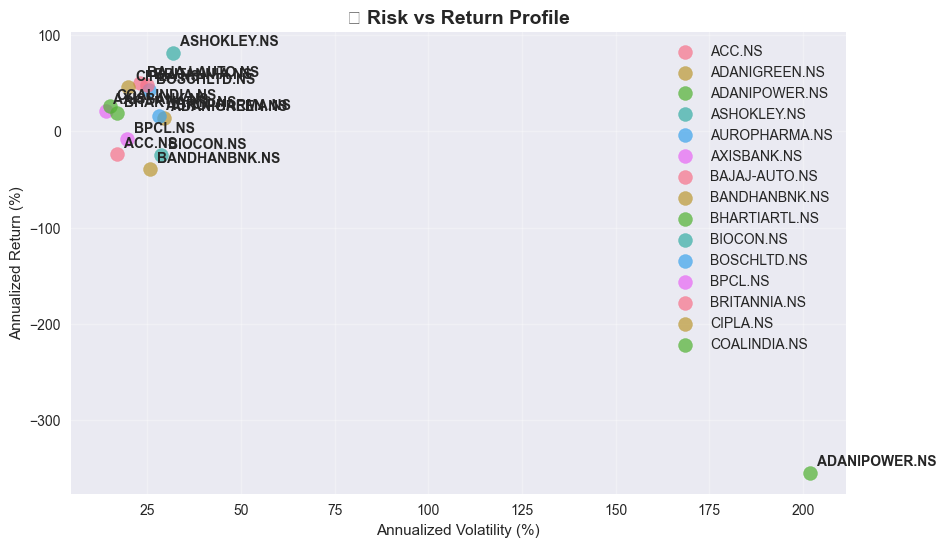

In [15]:
# 3. Risk and Return Metrics
print("⚖️ RISK & RETURN ANALYSIS")
print("=" * 60)

metrics_df = pd.DataFrame()

for stock_name, df in data.items():
    if 'Daily_Return' in df.columns:
        returns = df['Daily_Return']
        
        # Calculate metrics
        metrics = {
            'Avg Daily Return (%)': returns.mean() * 100,
            'Annualized Return (%)': returns.mean() * 252 * 100,
            'Volatility (%)': returns.std() * 100,
            'Annualized Volatility (%)': returns.std() * np.sqrt(252) * 100,
            'Sharpe Ratio': (returns.mean() / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0,
            'Max Drawdown (%)': ((df['Close'] / df['Close'].cummax()) - 1).min() * 100,
            'VaR 95% (%)': np.percentile(returns * 100, 5),
            'Skewness': returns.skew(),
            'Kurtosis': returns.kurtosis()
        }
        
        metrics_df[stock_name] = metrics

# Display metrics table
print(metrics_df.round(3))

# Risk-Return Scatter Plot
plt.figure(figsize=(10, 6))
for stock in metrics_df.columns:
    x = metrics_df.loc['Annualized Volatility (%)', stock]
    y = metrics_df.loc['Annualized Return (%)', stock]
    plt.scatter(x, y, s=100, label=stock.replace('_', '.'), alpha=0.7)
    plt.annotate(stock.replace('_', '.'), (x, y), xytext=(5, 5), 
                textcoords='offset points', fontweight='bold')

plt.xlabel('Annualized Volatility (%)')
plt.ylabel('Annualized Return (%)')
plt.title('📊 Risk vs Return Profile', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

🔄 CORRELATION ANALYSIS
Daily Returns Correlation Matrix:
               ACC_NS  ADANIGREEN_NS  ADANIPOWER_NS  ASHOKLEY_NS  \
ACC_NS          1.000          0.487          0.082        0.477   
ADANIGREEN_NS   0.487          1.000          0.020        0.501   
ADANIPOWER_NS   0.082          0.020          1.000        0.128   
ASHOKLEY_NS     0.477          0.501          0.128        1.000   
AUROPHARMA_NS  -0.027          0.281         -0.454        0.177   
AXISBANK_NS     0.415          0.461         -0.225        0.390   
BAJAJ-AUTO_NS   0.539          0.406          0.213        0.666   
BANDHANBNK_NS   0.273          0.480          0.051        0.430   
BHARTIARTL_NS   0.321          0.381         -0.107        0.291   
BIOCON_NS       0.161          0.339          0.042        0.395   
BOSCHLTD_NS    -0.000          0.256          0.153        0.336   
BPCL_NS         0.103          0.484         -0.029        0.070   
BRITANNIA_NS    0.119          0.184         -0.132        

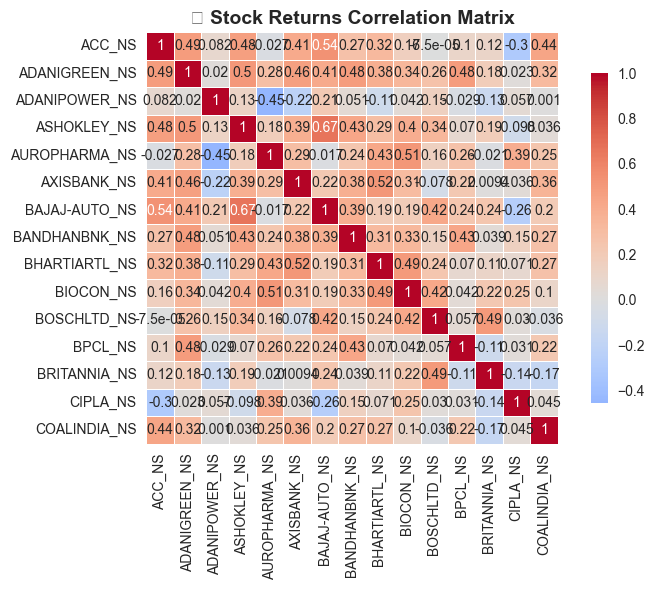


Price Correlation Matrix:
               ACC_NS  ADANIGREEN_NS  ADANIPOWER_NS  ASHOKLEY_NS  \
ACC_NS          1.000          0.628         -0.281        0.392   
ADANIGREEN_NS   0.628          1.000         -0.361        0.114   
ADANIPOWER_NS  -0.281         -0.361          1.000       -0.510   
ASHOKLEY_NS     0.392          0.114         -0.510        1.000   
AUROPHARMA_NS   0.287          0.788         -0.404       -0.100   
AXISBANK_NS     0.603          0.663         -0.786        0.382   
BAJAJ-AUTO_NS   0.292         -0.181         -0.366        0.879   
BANDHANBNK_NS   0.596          0.613          0.178       -0.048   
BHARTIARTL_NS   0.497          0.701         -0.386        0.352   
BIOCON_NS       0.361          0.765          0.094       -0.254   
BOSCHLTD_NS    -0.249         -0.231         -0.061        0.465   
BPCL_NS         0.527          0.790         -0.132       -0.194   
BRITANNIA_NS    0.312          0.148         -0.592        0.736   
CIPLA_NS       -0.261

In [16]:
# 4. Correlation Analysis
print("🔄 CORRELATION ANALYSIS")
print("=" * 40)

# Create correlation matrix for returns
correlation_matrix = returns_data.corr()
print("Daily Returns Correlation Matrix:")
print(correlation_matrix.round(3))

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('📈 Stock Returns Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Price correlation
price_data = pd.DataFrame()
for stock_name, df in data.items():
    price_data[stock_name] = df['Close']

price_correlation = price_data.corr()
print("\nPrice Correlation Matrix:")
print(price_correlation.round(3))

In [17]:
# 5. Technical Analysis Summary
print("🔧 TECHNICAL ANALYSIS SUMMARY")
print("=" * 50)

for stock_name, df in data.items():
    print(f"\n📊 {stock_name.replace('_', '.')}:")
    
    current_price = df['Close'].iloc[-1]
    
    # SMA Analysis
    if 'SMA_20' in df.columns:
        sma_20 = df['SMA_20'].iloc[-1]
        if pd.notna(sma_20):
            sma_signal = "BUY" if current_price > sma_20 else "SELL"
            sma_diff = ((current_price - sma_20) / sma_20) * 100
            print(f"  • Price vs 20-SMA: {sma_diff:+.2f}% → {sma_signal}")
    
    # Support and Resistance
    recent_high = df['High'].rolling(20).max().iloc[-1]
    recent_low = df['Low'].rolling(20).min().iloc[-1]
    print(f"  • 20-day High: ₹{recent_high:.2f}")
    print(f"  • 20-day Low: ₹{recent_low:.2f}")
    print(f"  • Current Position: {((current_price - recent_low) / (recent_high - recent_low) * 100):.1f}% of range")
    
    # Volume Analysis
    avg_volume = df['Volume'].rolling(20).mean().iloc[-1]
    current_volume = df['Volume'].iloc[-1]
    volume_ratio = current_volume / avg_volume if avg_volume > 0 else 0
    print(f"  • Volume vs 20-day avg: {volume_ratio:.2f}x")
    
    # Volatility
    if 'Daily_Return' in df.columns:
        recent_vol = df['Daily_Return'].rolling(20).std().iloc[-1] * 100
        print(f"  • 20-day Volatility: {recent_vol:.2f}%")

🔧 TECHNICAL ANALYSIS SUMMARY

📊 ACC.NS:
  • Price vs 20-SMA: +2.37% → BUY
  • 20-day High: ₹1888.00
  • 20-day Low: ₹1781.10
  • Current Position: 91.7% of range
  • Volume vs 20-day avg: 2.53x
  • 20-day Volatility: 0.55%

📊 ADANIGREEN.NS:
  • Price vs 20-SMA: +8.00% → BUY
  • 20-day High: ₹1071.00
  • 20-day Low: ₹908.50
  • Current Position: 75.2% of range
  • Volume vs 20-day avg: 8.86x
  • 20-day Volatility: 1.66%

📊 ADANIPOWER.NS:
  • Price vs 20-SMA: -67.92% → SELL
  • 20-day High: ₹658.55
  • 20-day Low: ₹120.00
  • Current Position: 4.1% of range
  • Volume vs 20-day avg: 9.27x
  • 20-day Volatility: 18.45%

📊 ASHOKLEY.NS:
  • Price vs 20-SMA: +6.06% → BUY
  • 20-day High: ₹142.63
  • 20-day Low: ₹125.85
  • Current Position: 89.6% of range
  • Volume vs 20-day avg: 1.96x
  • 20-day Volatility: 1.64%

📊 AUROPHARMA.NS:
  • Price vs 20-SMA: +5.34% → BUY
  • 20-day High: ₹1138.00
  • 20-day Low: ₹1016.10
  • Current Position: 84.6% of range
  • Volume vs 20-day avg: 0.70x
  • 20-

In [18]:
# 6. Export Analysis Results
print("💾 EXPORTING ANALYSIS RESULTS")
print("=" * 40)

# Create analysis summary
analysis_date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
summary = {
    'analysis_date': analysis_date,
    'stocks_analyzed': list(data.keys()),
    'data_period': f"{min([df.index.min() for df in data.values()])} to {max([df.index.max() for df in data.values()])}",
    'total_records': sum([len(df) for df in data.values()])
}

# Save metrics to CSV
if not metrics_df.empty:
    output_file = f'../data/processed/analysis_metrics_{datetime.now().strftime("%Y%m%d")}.csv'
    metrics_df.T.to_csv(output_file)
    print(f"✅ Metrics exported to: {output_file}")

# Save correlation matrix
if not correlation_matrix.empty:
    corr_file = f'../data/processed/correlation_matrix_{datetime.now().strftime("%Y%m%d")}.csv'
    correlation_matrix.to_csv(corr_file)
    print(f"✅ Correlation matrix exported to: {corr_file}")

print(f"\n📋 Analysis Summary:")
for key, value in summary.items():
    print(f"  • {key}: {value}")

print("\n🎉 Analysis complete! Check the exported files for detailed results.")

💾 EXPORTING ANALYSIS RESULTS
✅ Metrics exported to: ../data/processed/analysis_metrics_20250921.csv
✅ Correlation matrix exported to: ../data/processed/correlation_matrix_20250921.csv

📋 Analysis Summary:
  • analysis_date: 2025-09-21 02:18:28
  • stocks_analyzed: ['ACC_NS', 'ADANIGREEN_NS', 'ADANIPOWER_NS', 'ASHOKLEY_NS', 'AUROPHARMA_NS', 'AXISBANK_NS', 'BAJAJ-AUTO_NS', 'BANDHANBNK_NS', 'BHARTIARTL_NS', 'BIOCON_NS', 'BOSCHLTD_NS', 'BPCL_NS', 'BRITANNIA_NS', 'CIPLA_NS', 'COALINDIA_NS']
  • data_period: 2025-07-22 00:00:00 to 2025-09-19 00:00:00
  • total_records: 645

🎉 Analysis complete! Check the exported files for detailed results.
